In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
284,48,141000,0
389,48,35000,1
84,30,62000,0
196,30,79000,0
219,59,143000,1


# Train test split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1),
                                                    df['Purchased'],
                                                    test_size = 0.3,
                                                    random_state = 0
)
X_train.shape, X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) # numpy array
X_test_scaled = scaler.transform(X_test) # numpy array

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) # changing to df
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [11]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,3.489272e-17,6.344132e-17
std,1.001791e+00,1.001791e+00
min,-1.947491e+00,-1.584970e+00
25%,-7.710131e-01,-7.752370e-01
50%,-8.473441e-02,2.003677e-02
75%,7.976239e-01,5.261201e-01
max,2.170181e+00,2.319101e+00


In [12]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of scaling

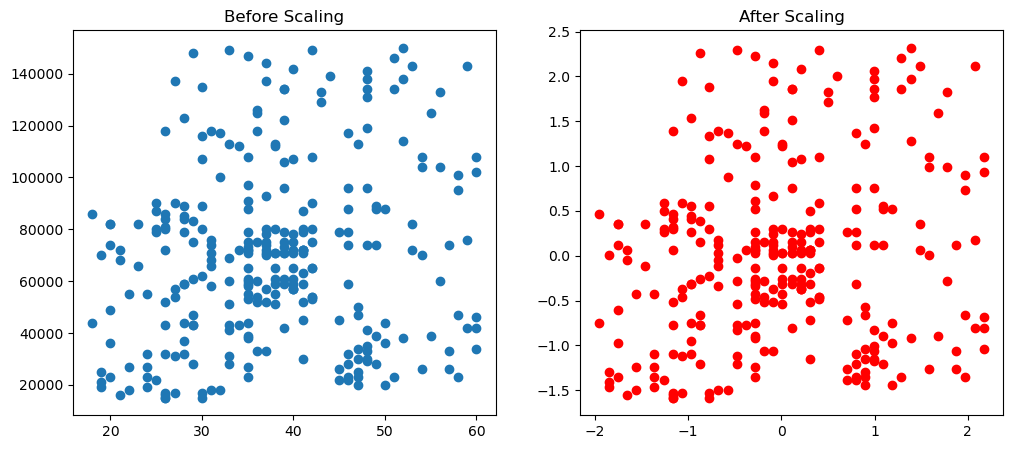

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()


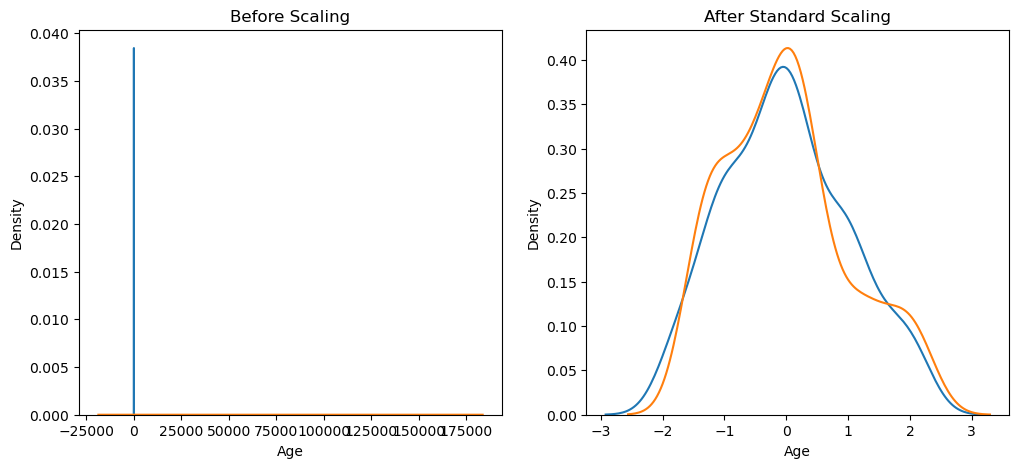

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of distributions

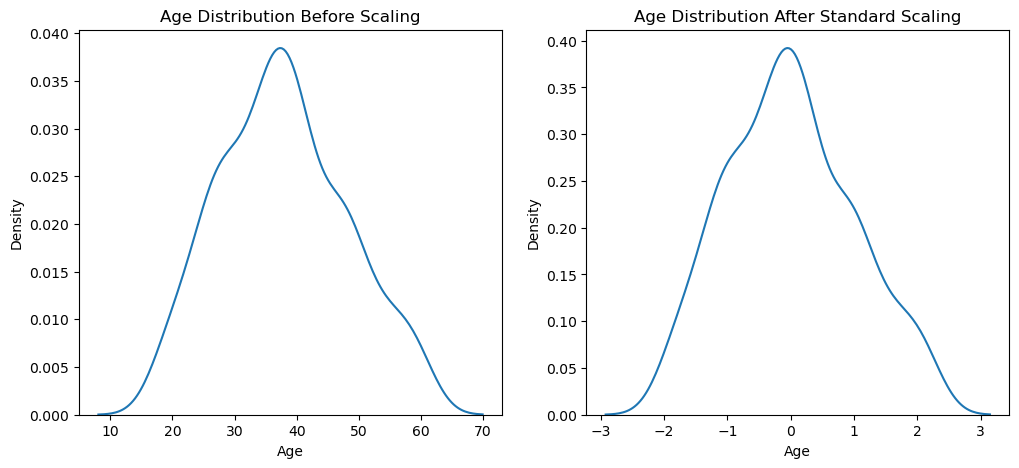

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

<h1 style="color: cyan">Why scaling is important </h1>

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [21]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

## Accuracy score

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [29]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [31]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.8666666666666667


In [32]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Effect of Outliers

In [34]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})],ignore_index=True)

In [35]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


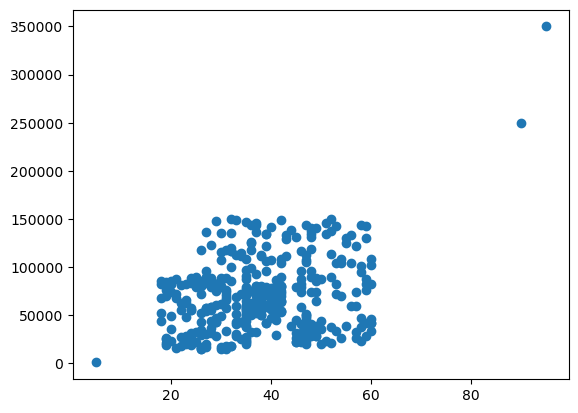

In [36]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1),
                                                    df['Purchased'],
                                                    test_size = 0.3,
                                                    random_state = 0
)
X_train.shape, X_test.shape

((282, 2), (121, 2))

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) # numpy array
X_test_scaled = scaler.transform(X_test) # numpy array

In [39]:
scaler.mean_

array([3.81489362e+01, 6.91382979e+04])

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) # changing to df
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_train_scaled

,Age,EstimatedSalary
0,-0.652473,-0.995561
1,1.903047,2.092697
2,-0.104862,1.922701
3,-0.652473,0.562734
4,-0.013593,-0.287245
...,...,...
277,0.899092,-1.108891
278,-0.835010,-0.740567
279,-0.196130,-0.485573
280,-1.017547,-0.428908


In [41]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.820000e+02,2.820000e+02
mean,1.921237e-16,6.614095e-17
std,1.001778e+00,1.001778e+00
min,-3.025456e+00,-1.930537e+00
25%,-7.437417e-01,-7.405668e-01
50%,-1.048617e-01,-3.225098e-02
75%,7.165553e-01,4.989859e-01
max,4.732372e+00,5.124288e+00


In [42]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,282.0,282.0
mean,0.0,0.0
std,1.0,1.0
min,-3.0,-1.9
25%,-0.7,-0.7
50%,-0.1,-0.0
75%,0.7,0.5
max,4.7,5.1


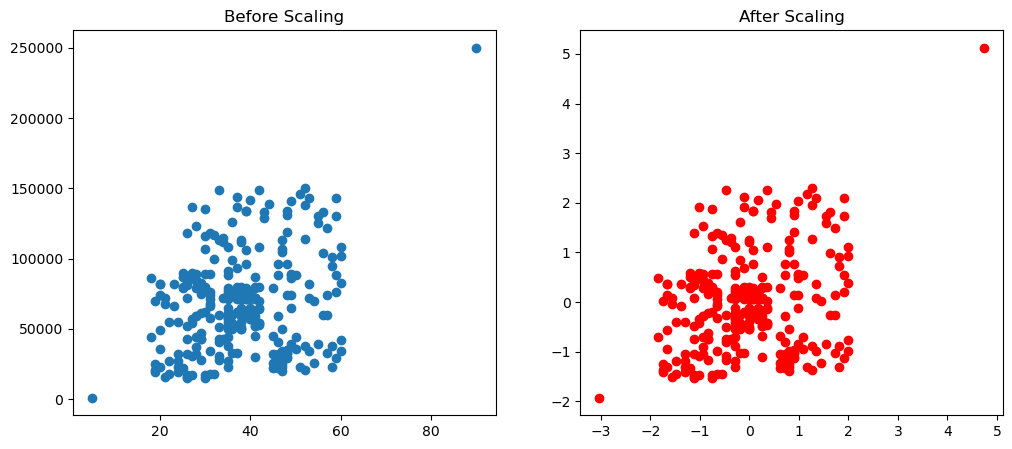

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()


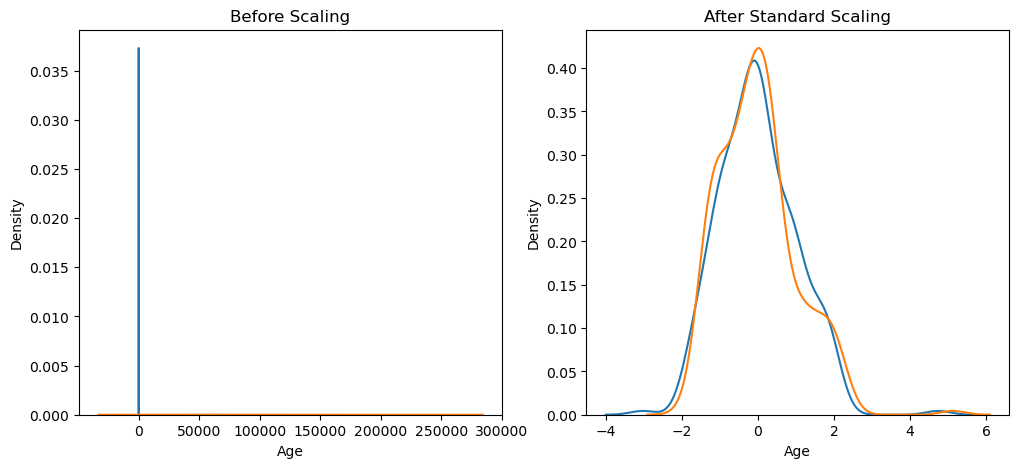

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

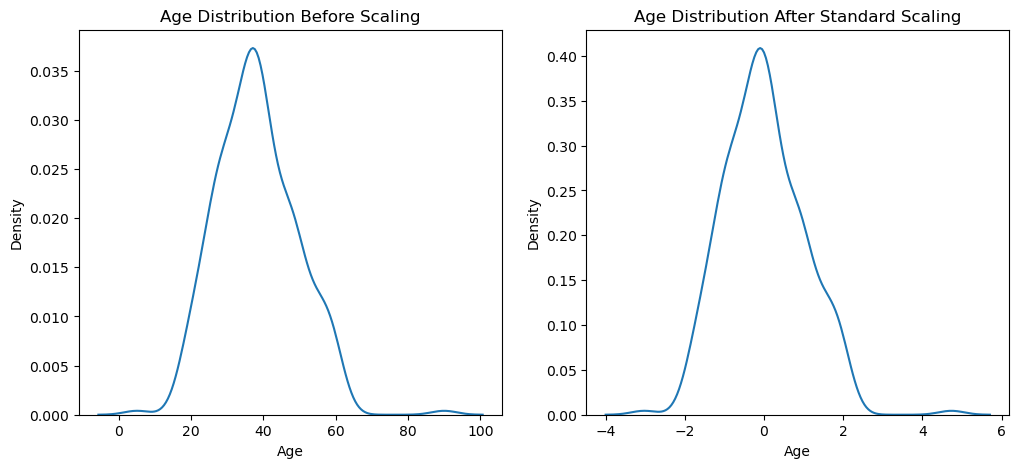

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

In [46]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [47]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [48]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [49]:
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.6446280991735537
Scaled 0.8512396694214877
